# CAFETERIAI   ⚙️ A Smart Cafe ⚙️
AI CLUB 

ALPHARETTA HIGH SCHOOL

🍏🍓🍇🥚🥞🍗🍔🍟🍕🌮🍣🍦🍰🥛🍩

# PART -1 --> ALL INPUTES NEEDED

In [1]:
#Number of sec that the food video is cut 
#1000 is 1 sec and 2000 is 2 sec
numsec = 1000
#face confidence is oppisite 
#0 is good and 100 is bad
faceconfmin = 0
faceconfmax = 100
#resnet cutting image min prob percentage 
minimum_percentage_probability = 10
#when detecting food if frequency is lower than x it gets deleted
frequency_delete = 3
#when deleteing food the probability limit it 
probability_limit = 50
#face probability 
#oppiste way 0 is good and 100 is bad
#if greater than----
probabiliy_face_delete = 75
#minimum_distribution
minimum_distribution = 0.5


# PART 0
Setup files and libraries

In [2]:
#!pip3 install dfply
#pip install jupyternotify
#!pip install psutil

In [3]:
import cv2
import numpy as np
import time
import os
import shutil
from PIL import Image
import psutil
import random
import datetime
from pprint import pprint
import matplotlib.pyplot as plt
import os
import datetime
import random
import glob
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse
import csv
from dfply import *
from IPython.display import Markdown, display
from datetime import date
import pickle
import jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

# 
SET LOCATION

In [4]:
#Folder to save video *new
base_dir ='/Users/kunal/Documents/AI/Cafeteria/src/final_new_vids_in/'
os.chdir(base_dir)

# PART A
#CAPTURE VIDEO
BREAK INTO FRAME
#LOAD FILES IN A COMMON FOLDER UNTIL STUDENT IS IDENTIFIED

# A1. This function extracts images from video with 1 fps

In [5]:
def extract_image_one_fps(video_source_path):
    vidcap = cv2.VideoCapture(video_source_path)
    count = 0
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*numsec)) # 2 second***   
        success,image = vidcap.read()
        ## Stop when last frame is identified
        image_last = cv2.imread("frame{}.png".format(count-1))
        if np.array_equal(image, image_last):
            break
        cv2.imwrite("frame%d.png" % count, image)     # save frame as PNG file
        print( '{}.sec reading a new frame:{}'.format(count,success))
        count += 1

In [6]:
#FUNCTION FOR ROTATION
#--------
def rotate_image(image,deg):
    if deg ==90:
        return np.rot90(image)
    if deg ==180:
        return np.rot90(image,2)
    if deg == 270:
        return np.rot90(image,-1) #Reverse 90 deg rotation
#--------  

In [7]:
def printmd(string):
    display(Markdown(string))
#printmd("<span style='color:blue'>Red text</span>")
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [8]:
#!pwd

# A2. Name & Folders

In [9]:
student_name = 'CAFETERIA' ## FIXED NAME AT THIS STAGE input()   

# A3.2 PRE-RECORDED VIDEOS CONVERTION

In [10]:
# AUTO POPULATE FILE TYPE (mp4, avi, MOV etc.)
x = os.listdir(os.path.join(base_dir, 'CAFETERIA'))
matching = [s for s in x if "CAFETERIA" in s]
filename, V_FORMAT = os.path.splitext(matching[0])
print("V_FORMAT: ",V_FORMAT)
#-----
cap = cv2.VideoCapture(os.path.join(base_dir, student_name, "CAFETERIA" + V_FORMAT ) )
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
print("video length:", video_length)
#----
os.chdir(os.path.join(os.path.join(base_dir,  student_name) ) )
extract_image_one_fps('CAFETERIA'+ V_FORMAT)
#----
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
try: 
    video_length > 96 
    print("VIDEO SIZE ", video_length, " FRAMES")
except ValueError:
    print('Oops! That was an invalid recording. Check the webcam setting and try again')
else:
    print('Thank you.')

V_FORMAT:  .mp4
video length: 126
0.sec reading a new frame:True
1.sec reading a new frame:True
2.sec reading a new frame:True
3.sec reading a new frame:True
4.sec reading a new frame:True
5.sec reading a new frame:True
6.sec reading a new frame:True
7.sec reading a new frame:True
8.sec reading a new frame:True
9.sec reading a new frame:True
10.sec reading a new frame:True
11.sec reading a new frame:True
12.sec reading a new frame:True
13.sec reading a new frame:False
VIDEO SIZE  126  FRAMES
Thank you.


# A4. IDENTIFY PERSON
openCV_faceRECOGNITION_f

# A4.a Models

In [11]:
face_cascade = cv2.CascadeClassifier('/Users/kunal/Documents/AI/Cafeteria/src/cascades/data/haarcascade_frontalface_alt2.xml')
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Face Model (latest!)

In [12]:
recognizer.read('/Users/kunal/Documents/AI/Cafeteria/src/recognizers/face-trainner.yml') # updated 0307
labels = {}
with open('/Users/kunal/Documents/AI/Cafeteria/src/pickles/labels.pickle', 'rb') as f:
    og_labels = pickle.load(f)
    labels = {v:k for k,v in og_labels.items()} 
print(og_labels)

{'aneesh': 0, 'kunal': 1, 'kruthik': 2, 'sidd': 3, 'sahith': 4, 'jeffery': 5, 'hatcher': 6, 'srihith': 7, 'sahil': 8}


# A4.b Read Video Recorded (or Loaded) earlier

In [13]:
os.chdir(os.path.join(os.path.join(base_dir,  student_name) ) )
os.path.join(os.path.join(base_dir,  student_name), student_name + '_face' + V_FORMAT ) 
feedback_vid = os.path.join(os.path.join(base_dir,  student_name), student_name + '_face' + V_FORMAT ) 

In [14]:
# RUN VIDEO RECORDED EARLIER
cap = cv2.VideoCapture(os.path.join(os.path.join(base_dir,  student_name), student_name + '_face' + V_FORMAT ))

# A4.c Identify Student

In [15]:
video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) - 1
print("video_length:",  video_length)
#!pwd

video_length: 16


In [16]:
# THIS CODE DOES NOT DO ROTATION
PICK_NAMES = []
frame_cnt = 0
while(frame_cnt < video_length*.99):
    ret, frame = cap.read()
    try: 
        gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(frame) #, scaleFactor=1.7, minNeighbors=5) #, minSize=(100, 100))
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]        
            # recognizes
            id_, conf = recognizer.predict(roi_gray) # give label id and confidence
            #---- DEFINE PROBABILITY ----#
            if conf >= faceconfmin and conf < faceconfmax:                
                #print(labels[id_])
                #print(conf)
                print(labels[id_], round(conf,0) )
                PICK_NAMES.append( [labels[id_], conf] ) # ****
                #----
                img_item = "ExtractFaceFrame.png"
                cv2.imwrite(img_item, roi_gray)
                #----
                color = (255,0,0) # BGR 0-255
                stroke = 2
                end_cord_x = x+ w
                end_cord_y = y + h
                cv2.rectangle(frame, (x,y), (end_cord_x, end_cord_y), color, stroke)                
        # Display the resulting frame 
        cv2.imshow('frame', frame)
        frame_cnt += 1
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
    except ValueError:
        print('Oops! Either the 1st or last frame invalid')
    else:
        print(frame_cnt)
#----        # BREAK IF PICK_NAMES IS EMPTY
if len(PICK_NAMES) ==0:
    print("NO FACE SAMPLE COLLECTED! ")    

sahith 71.0
1
kunal 62.0
2
kunal 59.0
3
sahith 59.0
4
kunal 60.0
5
sahith 60.0
6
sahith 60.0
7
kunal 60.0
8
kunal 61.0
9
kunal 61.0
10
kunal 61.0
11
kunal 60.0
12
sahith 65.0
13
kunal 65.0
14
sahith 63.0
15
sahith 65.0
16


In [17]:
cap.release()
cv2.destroyAllWindows()

In [18]:
if len(PICK_NAMES) ==0:
    print("NO FACE SAMPLE COLLECTED! ")
else:
    print(PICK_NAMES[:10])   

[['sahith', 70.56470903218354], ['kunal', 62.158298998620936], ['kunal', 59.25809484456184], ['sahith', 58.543915740616114], ['kunal', 59.98125778153537], ['sahith', 59.96180854419322], ['sahith', 59.99783929423889], ['kunal', 60.20106845132097], ['kunal', 61.174727872182046], ['kunal', 61.10087354631938]]


# A4.d Resolve Student Identity

In [19]:
df = pd.DataFrame()
for itm in PICK_NAMES:
    teststring =[]
    teststring.append(itm[0])
    teststring.append(itm[1])
    df = df.append([teststring])
    
df.columns = ['name','probability']
#dftest = dftest.reset_index()

In [20]:
df= df.round(2) #***

In [21]:
df = df.sort_values(['name', 'probability'], ascending= True)
df['probability_average'] = df['probability'].mean()
df.head()

,name,probability,probability_average
0,kunal,59.26,62.0
0,kunal,59.98,62.0
0,kunal,60.20,62.0
0,kunal,60.25,62.0
0,kunal,61.10,62.0


In [22]:
df1 = df.groupby('name')['probability'].median().reset_index()
df1 = df1.sort_values(['probability'], ascending= True)
df1['probability_average'] = df['probability'].mean()
df1

,name,probability,probability_average
0,kunal,61.10,62.0
1,sahith,62.93,62.0


In [23]:
df2= df.name.value_counts() # FREQUENCY
df2 = pd.DataFrame(df2)
df2.index.name = 'x'
df2.reset_index(inplace=True)
df2.columns = ['name', 'frequency']
#df2.head()
#df2=df2.tail(-1)
#df2

In [24]:
df2['distribution'] = df2['frequency']/video_length

In [25]:
final_face = pd.merge(df1, df2, on='name')
final_face.head()

,name,probability,probability_average,frequency,distribution
0,kunal,61.10,62.0,9,0.5625
1,sahith,62.93,62.0,7,0.4375


In [26]:
final_face_save = final_face

In [27]:
for index, row in final_face.iterrows():
    dist = row['distribution']
    namelist = row['name']
    #print(student_name)
    if dist < minimum_distribution:
        print("Deleting", namelist, "--" ,dist)
        #print(final_face.index[i])
        final_face = final_face[~final_face.name.str.contains(namelist)]
    else:
        student_name = "CAFETERIA"
final_face

Deleting sahith -- 0.4375


,name,probability,probability_average,frequency,distribution
0,kunal,61.1,62.0,9,0.5625


In [28]:
for index, row in final_face.iterrows():
    prob = row['probability_average']
    namelist = row['name']
    if prob > probabiliy_face_delete:
        print("Deleting ->", name, "--",prob)
        final_face = final_face[~final_face.name.str.contains(namelist)]
        #student_name = "CAFETERIA"
print(student_name)

CAFETERIA


In [29]:
final_face

,name,probability,probability_average,frequency,distribution
0,kunal,61.1,62.0,9,0.5625


In [30]:
len(final_face.index)

1

In [31]:
if len(final_face.index) != 0:
    student_name = final_face["name"].values[0]
    print('>> ', final_face["name"].values[0], "<< ", "identity confirmed!", 
          "face recognized", df2['frequency'].values[0], "times out of", video_length, "frames" )
else:
    student_name = "Student_not_identified"
    print('Resolve the Identity Conflict among >>', list(final_face_save.name),  "<<")

>>  kunal <<  identity confirmed! face recognized 9 times out of 16 frames


In [32]:
'''
if student_name == "Student_not_identified":
   %%notify -m 'ERROR-- YOU ARE NOT IN MODEL'
'''

'\nif student_name == "Student_not_identified":\n   %%notify -m \'ERROR-- YOU ARE NOT IN MODEL\'\n'

In [33]:
# PROPOTIONAL VALUES ****NEW
print(final_face["distribution"][0], " percent of time faces was recognized for the highest contender")

0.5625  percent of time faces was recognized for the highest contender


In [34]:
studentid_conf = round(100* final_face["frequency"].values[0] / sum(final_face["frequency"]),0)
print(studentid_conf, "Calculated Confidence Level 100 is the highest level")

100.0 Calculated Confidence Level 100 is the highest level


In [35]:
%%notify -o

'FACE is {}'.format(student_name) # FINAL NAME TO GO FORWARD

'FACE is kunal'

<IPython.core.display.Javascript object>

In [36]:
os.system('say "Face Face Face is {}"'.format(student_name))

1

In [37]:
%%capture outputface
# ABSOLUTE VALUE
#printmd("<span style='color:blue'>Red text</span>")
if len(final_face.index) != 0:
    student_name = final_face["name"].values[0]
    print('>> ', final_face["name"].values[0], "<< ", "identity confirmed!", 
          "face recognized", df2['frequency'].values[0], "times out of", video_length, "frames" )
else:
    student_name = "Student_not_identified"
    print('Resolve the Identity Conflict among >>', list(final_face_save.name),  "<<")
# PROPOTIONAL VALUES ****NEW
print("----------------------------->")
print(final_face["distribution"][0], " percent of time faces was recognized for the highest contender")
print("----------------------------->")
studentid_conf = round(100* final_face["frequency"].values[0] / sum(final_face["frequency"]),0)
print(studentid_conf, "Calculated Confidence Level 100 is the highest level")
print("----------------------------->")
print(student_name) # FINAL NAME TO GO FORWARD

In [38]:
if student_name == 'Student_not_identified':
    #student_name=input(student_name) # FIXED FOR NOW 🏴🏳️🏴
    student_name="SOME_STUDENT"
print(student_name)

kunal


# PART B 
LaunchPad

# B0.

In [39]:
# ONE TIME ONLY
import os
import numpy as np
import cv2
import datetime
import random

In [40]:
os.chdir('/Users/kunal/Documents/AI/Cafeteria/src/')
from utils import CFEVideoConf, image_resize #currently stores in JUSTIN/src folder

In [41]:
base_dir = '/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/'
video_in = '/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/in/'
image_out = '/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/out/'

In [42]:
os.chdir(os.path.join(base_dir, 'in') )
os.getcwd()

'C:\\Users\\kunal\\Documents\\AI\\Cafeteria\\src\\final_ph_out\\in'

# B1. Move Files to Student Folder

In [43]:
# MOVE AND RENAME THE FOLDER
# ------------------------------
shutil.move('/Users/kunal/Documents/AI/Cafeteria/src/final_new_vids_in/CAFETERIA/', video_in)


'/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/in/CAFETERIA'

In [44]:
now = str(datetime.datetime.now())
os.getcwd()

'C:\\Users\\kunal\\Documents\\AI\\Cafeteria\\src\\final_ph_out\\in'

In [45]:
#matching = [s for s in os.listdir(".") if student_name in s]
nm_check = [s for s in os.listdir(".") if student_name == s]
if nm_check == []:
    os.rename('CAFETERIA', student_name)
elif nm_check[0] == student_name:
    os.rename(student_name, student_name + str(round(random.random(),2)) )
    os.rename('CAFETERIA', student_name)

In [46]:
video_name = "".join((str(student_name), V_FORMAT))
video_name

'kunal.mp4'

In [47]:
save_path =  os.path.join(base_dir, 'in', student_name, video_name )
save_path

'/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/in\\kunal\\kunal.mp4'

# PART C
IMAGEAI OBJECT SEPARATION
IMAGEAI_OBECTION_DETECTION3_f

# C0.

In [1]:
from imageai.Prediction import ImagePrediction 
from imageai.Detection import ObjectDetection
detector = ObjectDetection()

ModuleNotFoundError: No module named 'keras'

In [49]:
os.chdir(os.path.join(base_dir, 'in', student_name) )
execution_path = os.path.join(base_dir, 'in', student_name)
execution_path

'/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/in\\kunal'

# C1. Model Selection

In [50]:
# MODEL option A
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath('/Users/kunal/Documents/AI/IMAGE_AI/ImageAI-master/MODELS/resnet50_coco_best_v2.0.1.h5')
detector.loadModel()
"""
# MODEL option B
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/MODELS/yolo.h5')
detector.loadModel()
"""

W1104 17:49:45.549858 11176 deprecation_wrapper.py:119] From C:\Users\kunal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1104 17:49:45.609810 11176 deprecation_wrapper.py:119] From C:\Users\kunal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W1104 17:49:45.613772 11176 deprecation_wrapper.py:119] From C:\Users\kunal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1104 17:49:47.850129 11176 deprecation_wrapper.py:119] From C:\Users\kunal\Anaconda3\lib\site-packages\imageai\Detection\keras_retinanet\backend\tensorflow_backend.py:22: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.

W1104 17:49:49.383612 11176 depre

"\n# MODEL option B\ndetector = ObjectDetection()\ndetector.setModelTypeAsYOLOv3()\ndetector.setModelPath('/Users/NidhiAneja/Documents/AI/IMAGE_AI/ImageAI-master/MODELS/yolo.h5')\ndetector.loadModel()\n"

# C2. Object Separation

In [51]:
!pwd
student_name

'pwd' is not recognized as an internal or external command,
operable program or batch file.


'kunal'

In [52]:
lst_frames = os.listdir()
lst_frames = sorted(lst_frames)
# cleanup 1
if '.DS_Store' in lst_frames: lst_frames.remove('.DS_Store')
lst_frames

['CAFETERIA.mp4',
 'CAFETERIA_face.mp4',
 'ExtractFaceFrame.png',
 'frame0.png',
 'frame1.png',
 'frame10.png',
 'frame11.png',
 'frame12.png',
 'frame13.png',
 'frame2.png',
 'frame3.png',
 'frame4.png',
 'frame5.png',
 'frame6.png',
 'frame7.png',
 'frame8.png',
 'frame9.png']

In [53]:
# cleanup 2 #zero bytes file
for filename in os.listdir(os.path.join(video_in, student_name)):
     if os.path.getsize(filename) == 0:
            os.remove(filename) 
            print("File Removed!")

File Removed!


In [54]:
# FRAMES LIST UPDATED HERE FOR NEXT LOOP
lst_frames=[]
for filename in os.listdir(os.path.join(video_in, student_name)):
    if filename.startswith("frame"):
        lst_frames.append(filename)
lst_frames = sorted(lst_frames)
#lst_frames

In [55]:
execution_path

'/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/in\\kunal'

# Try Custom Objects! 

In [56]:
custom_objects = detector.CustomObjects(bottle = True, 
                                        cup = True,   #fork = True,   knife = True,   spoon = True,   bowl = True,   
                                        banana = True,   
                                        apple = True,   
                                        sandwich = True,   
                                        orange = True,
                                        broccoli = True,   
                                        carrot = True,     
                                        pizza = True,    
                                        cake = True,
                                        hot_dog = True,
                                        bowl = True,
                                        book = True)
# hotdog = True,  cellphone  = True

In [57]:
print(lst_frames)
for lst in lst_frames:
    print(lst)
    try:
        detections = detector.detectCustomObjectsFromImage(custom_objects = custom_objects, 
                                           input_image= os.path.join( execution_path, lst),
                                           output_image_path= lst[5] + str(random.randint(0,100)), 
                                           minimum_percentage_probability= minimum_percentage_probability,
                                           extract_detected_objects=True)
    except:
        pass
    else:
        print("PARSING IMAGES DONE!  ", lst)

len(lst_frames)

['frame0.png', 'frame1.png', 'frame10.png', 'frame11.png', 'frame12.png', 'frame2.png', 'frame3.png', 'frame4.png', 'frame5.png', 'frame6.png', 'frame7.png', 'frame8.png', 'frame9.png']
frame0.png
frame1.png
frame10.png
frame11.png
frame12.png
frame2.png
frame3.png
frame4.png
frame5.png
frame6.png
frame7.png
frame8.png
frame9.png


13

In [58]:
object_folders = [x[0] for x in os.walk(execution_path)][1:] 
object_folders = sorted(object_folders)

In [59]:
# GIVE RANDOM FILE NAMES BEFORE MOVING TO A SINGLE FOLDER
i = 0
for i in range(len(object_folders)):
    path = object_folders[i]
    #print(os.listdir(path))
    for filename in os.listdir(path):
        os.rename(path  + '/'+ filename, 
                  path  + '/captured'  +   str(random.randint(1,10001))  +'.jpg')
        i = i +1

In [60]:
#IDENTIFY ZERO BYTES FILES AND REMOVE THOSE  # cleanup 2 #zero bytes file        
REMOVE=0
for j in range(len(object_folders)):
    path = object_folders[j]
    for filename in os.listdir(path):
        if os.path.getsize(os.path.join(path, filename) ) < 20000:
            os.remove(os.path.join(path, filename) )
            REMOVE = +1
print(REMOVE, " Removed!")         

1  Removed!


In [61]:
#IDENTIFY ZERO BYTES FILES AND REMOVE THOSE  # cleanup 2 #zero bytes file        
REMOVE=0
for j in range(len(object_folders)):
    path = object_folders[j]
    for filename in os.listdir(path):
        if os.path.getsize(os.path.join(path, filename) ) > 80000:
            os.remove(os.path.join(path, filename) )
            REMOVE = +1
print(REMOVE, " Removed!")         

0  Removed!


In [62]:
# create objects folder to move all captured images in one folder
if not any(os.listdir(execution_path)) == "objects":
    os.mkdir("objects")

In [63]:
# MOVE FILES FROM object-n folders to object folder
for i in range(len(object_folders)):
    object_files = os.listdir(object_folders[i])
    if '.DS_Store' in object_files: object_files.remove('.DS_Store')
    for f in object_files:
        try:
            shutil.move(os.path.join(object_folders[i], f), os.path.join(execution_path, "objects"))
        except:
            pass

# PART D: CUSTOM MODEL PREDICTION

# D1. Load Custom Model 

In [64]:
#!pip3 install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [65]:
from imageai.Prediction.Custom import ModelTraining
from imageai.Prediction.Custom import CustomImagePrediction
prediction = CustomImagePrediction()
prediction.setModelTypeAsResNet()

In [66]:
custom_model_path='/Users/kunal/Documents/AI/IMAGE_AI/ImageAI-master/custom/'
os.chdir(os.path.join(custom_model_path, "models"))
os.listdir()

['model_ex-042_acc-0.985008.h5', '_DS_Store']

In [67]:
number_of_classes = 14

In [68]:
#*** 14 ITEMS *** 0303
prediction.setModelPath('/Users/kunal/Documents/AI/IMAGE_AI/ImageAI-master/custom/models/model_ex-042_acc-0.985008.h5') 
prediction.setJsonPath('/Users/kunal/Documents/AI/IMAGE_AI/ImageAI-master/custom/json/model_class.json')
#-----
prediction.loadModel(num_objects=14) #updated 0303

W1104 17:51:01.293886 11176 deprecation.py:506] From C:\Users\kunal\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# D2. Predict Food Items 

In [69]:
detected_path = os.path.join(execution_path, "objects")
all_files = os.listdir(detected_path)
if '.DS_Store' in all_files: all_files.remove('.DS_Store')
all_files[:2]

['captured1417.jpg', 'captured1964.jpg']

In [70]:
all_images_array = []
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(each_file)
all_images_array[:2]

['captured1417.jpg', 'captured1964.jpg']

# D3. Summarize Results

In [72]:
save_results = []
for i in results_array:
    FoodItem, prob = i["predictions"], i["percentage_probabilities"]
    for idx in range(len(FoodItem)):
        #print(pred[idx] , " : " , prob[idx])
        save_results.append( (FoodItem[idx], prob[idx]) )
    #print("-----------------------")

In [73]:
df = pd.DataFrame(save_results, columns=['FoodItem','Probability'])
len(df)

20

In [74]:
df["image_name"] = all_images_array
df.Probability = pd.to_numeric(df.Probability, errors = 'coerce').fillna(0).astype(np.int64)

In [75]:
file_ext = str(random.randint(1,100))
df.to_csv(os.path.join(execution_path, "save_results" + file_ext  + ".csv"), index=False, encoding = 'utf8')

In [76]:
df = df.sort_values([ 'FoodItem', 'Probability'], ascending= False)
df.head(2)

,FoodItem,Probability,image_name
16,Pizza,98,captured7883.jpg
14,McNuggets,95,captured6513.jpg


In [77]:
dfx = df

In [78]:
itm_tags = dfx.FoodItem.value_counts()
itm_tags = pd.DataFrame(itm_tags)
itm_tags.index.name = 'x'
itm_tags.reset_index(inplace=True)
itm_tags.columns = ['FoodItem', 'frequency']
itm_tags

,FoodItem,frequency
0,McNuggets,10
1,Cheerios,7
2,CheezIts,2
3,Pizza,1


In [79]:
Cutoff_freq = round(len(lst_frames)*0.1,0)
Cutoff_freq

1.0

In [80]:
FoodItem_excl_lst = []
for excl_lst in itm_tags[(itm_tags['frequency'] <= Cutoff_freq)]['FoodItem']:
    FoodItem_excl_lst.append(excl_lst)

In [81]:
print("deleting --->")
(FoodItem_excl_lst)

deleting --->


['Pizza']

In [82]:
df = df[~df['FoodItem'].isin(FoodItem_excl_lst)]
#df

# Probability Threshold

In [83]:
print(len(df))
df.Probability = pd.to_numeric(df.Probability, errors = 'coerce')
df = df.sort_values(['Probability'], ascending = False)
df = df.drop(df[df.Probability < probability_limit].index)
print(len(df))
#df

19
17


C:\Users\kunal\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [84]:
itm_tags = df.FoodItem.value_counts()
itm_tags = pd.DataFrame(itm_tags)
itm_tags.index.name = 'x'
itm_tags.reset_index(inplace=True)
itm_tags.columns = ['FoodItem', 'frequency']
itm_tags

,FoodItem,frequency
0,McNuggets,9
1,Cheerios,6
2,CheezIts,2


In [85]:
FoodItem_excl_lst = []
for excl_lst in itm_tags[(itm_tags['frequency'] <= Cutoff_freq)]['FoodItem']:
    FoodItem_excl_lst.append(excl_lst)

In [86]:
df = df[~df['FoodItem'].isin(FoodItem_excl_lst)]
#df

# Final

In [87]:
now = str(datetime.datetime.now())
#---
df['dates'] = (now[:10])
df['timestamp'] = (now[11:19])
df['student_name'] = student_name
#df

In [88]:
df = df.drop_duplicates('FoodItem')
df

,FoodItem,Probability,image_name,dates,timestamp,student_name
6,CheezIts,99,captured3832.jpg,2019-11-04,17:51:18,kunal
3,Cheerios,97,captured3059.jpg,2019-11-04,17:51:18,kunal
14,McNuggets,95,captured6513.jpg,2019-11-04,17:51:18,kunal


# D4. Price Table

In [89]:
# ONE TIME  ## ONLY 15 ITEMS ***
# REF- food folders:: https://drive.google.com/open?id=1zSOhOZWVygKn08tctel-Xfwnjq_nlaYE 
ItemCostTable = {"FoodItem" : [
    "Cheerios",
    "CheezIts","Chips","CinamonToastCrunch",
    "FruitSnacks", "GoldenGrahamsBar", "GoldenGrahamsCereal", 
    "McNuggets", "MilkBlue","MilkPurple", "NutriGrain",
    "Pizza", "QuarterPounder", "RiceKrispes"],
                 "Cost": [1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
CostTable = pd.DataFrame(ItemCostTable)          
#CostTable.head(4)

In [90]:
if not number_of_classes  == len(CostTable):
    print("! UPDATE PRICE TABLE !")
    

In [91]:
df = pd.merge(df, CostTable, on=['FoodItem', 'FoodItem'])

In [92]:
df

,FoodItem,Probability,image_name,dates,timestamp,student_name,Cost
0,CheezIts,99,captured3832.jpg,2019-11-04,17:51:18,kunal,2
1,Cheerios,97,captured3059.jpg,2019-11-04,17:51:18,kunal,1
2,McNuggets,95,captured6513.jpg,2019-11-04,17:51:18,kunal,8


# Add column

In [93]:
df['studentid_conf'] = studentid_conf
#df['similarityLevel'] = similarityLevel

In [94]:
df['file_extn'] = file_ext

# D5. Save CSV File **FINAL**

In [95]:
df.to_csv(os.path.join(execution_path, "final_safe_results" + file_ext  + ".csv"), 
          index=False, encoding = 'utf8')

# D6. VISUALS

In [96]:
os.path.join(video_in, student_name, "objects", df["image_name"].iloc[0])

'/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/in/kunal\\objects\\captured3832.jpg'

# 
**SHOW ONLY FINAL ITEMS DETECTED***

In [97]:
len(df)
df

,FoodItem,Probability,image_name,dates,timestamp,student_name,Cost,studentid_conf,file_extn
0,CheezIts,99,captured3832.jpg,2019-11-04,17:51:18,kunal,2,100.0,14
1,Cheerios,97,captured3059.jpg,2019-11-04,17:51:18,kunal,1,100.0,14
2,McNuggets,95,captured6513.jpg,2019-11-04,17:51:18,kunal,8,100.0,14


In [98]:
%notify -m "FOOD DONE"

<IPython.core.display.Javascript object>

In [99]:
os.system('say "Food done"')

1

captured3832.jpg
CheezIts
99


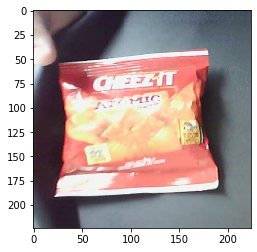

captured3059.jpg
Cheerios
97


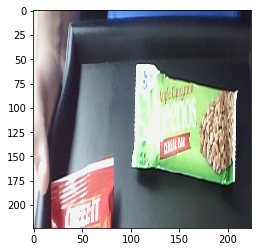

captured6513.jpg
McNuggets
95


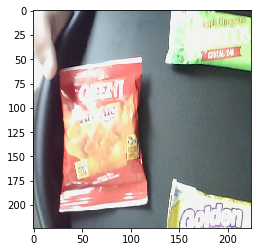

In [100]:
for i in range(len(df)):
    im = cv2.imread(os.path.join(video_in, student_name, "objects", 
                                 df["image_name"].iloc[i]))
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    print(df["image_name"].iloc[i])
    print(df["FoodItem"].iloc[i])
    print(df["Probability"].iloc[i])
    plt.show()

# 
**SHOW ALL ITEMS***

In [101]:
itm_tags = dfx.FoodItem.value_counts() # FREQUENCY
itm_tags = pd.DataFrame(itm_tags)
itm_tags.index.name = 'x'
itm_tags.reset_index(inplace=True)
itm_tags.columns = ['FoodItem', 'frequency']
itm_tags

,FoodItem,frequency
0,McNuggets,10
1,Cheerios,7
2,CheezIts,2
3,Pizza,1


captured7883.jpg
Pizza
98


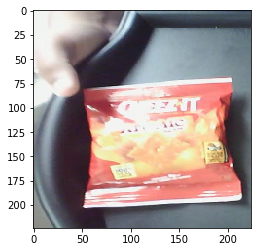

captured6513.jpg
McNuggets
95


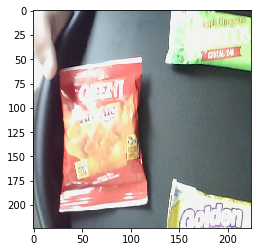

captured8717.jpg
McNuggets
94


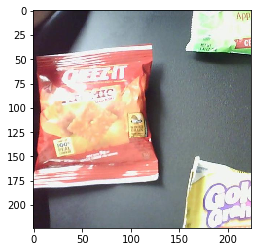

captured5527.jpg
McNuggets
90


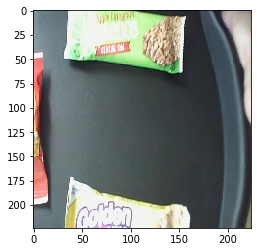

captured5973.jpg
McNuggets
90


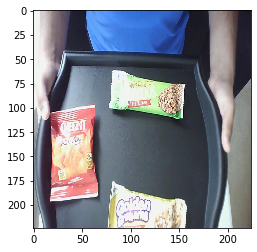

captured6500.jpg
McNuggets
87


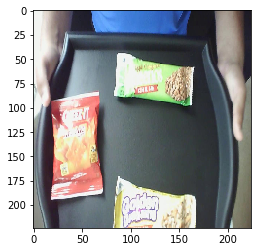

captured6937.jpg
McNuggets
80


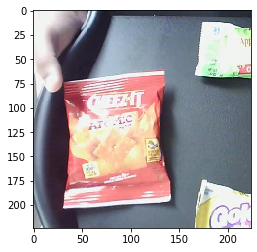

captured2972.jpg
McNuggets
79


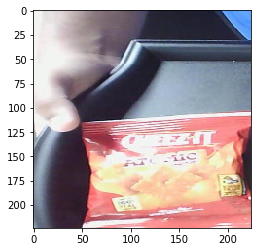

captured6199.jpg
McNuggets
74


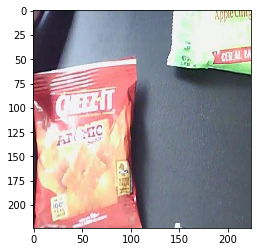

captured3126.jpg
McNuggets
67


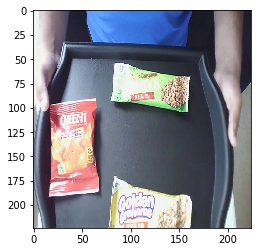

captured1964.jpg
McNuggets
48


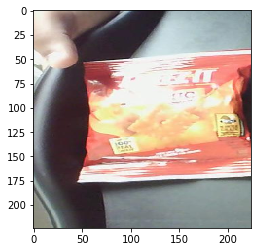

captured3832.jpg
CheezIts
99


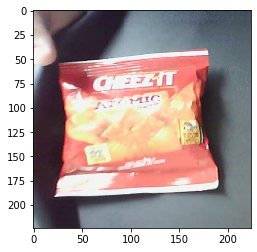

captured6460.jpg
CheezIts
56


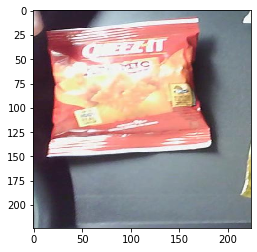

captured3059.jpg
Cheerios
97


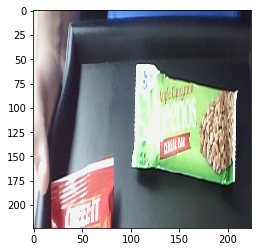

captured8347.jpg
Cheerios
97


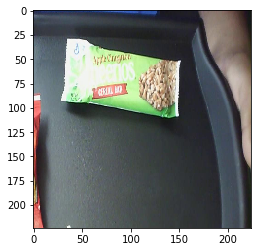

captured9673.jpg
Cheerios
81


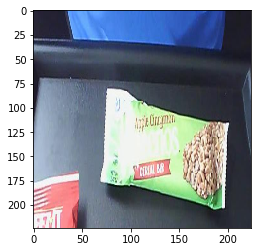

captured4663.jpg
Cheerios
62


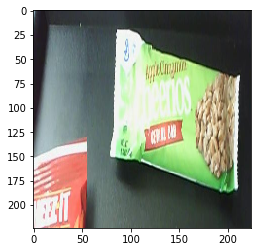

captured1417.jpg
Cheerios
52


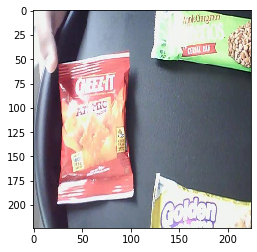

captured5036.jpg
Cheerios
52


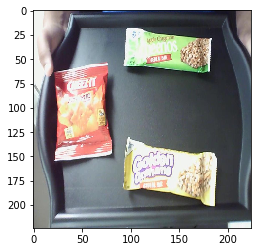

captured3375.jpg
Cheerios
33


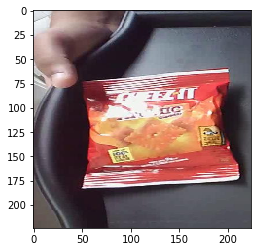

In [102]:
# show everything
for i in range(len(dfx)):
    im = cv2.imread(os.path.join(video_in, student_name, "objects", 
                                 dfx["image_name"].iloc[i]))
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    print(dfx["image_name"].iloc[i])
    print(dfx["FoodItem"].iloc[i])
    print(dfx["Probability"].iloc[i])
    plt.show()

In [103]:
os.path.join(video_in, student_name, "objects")

'/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/in/kunal\\objects'

In [104]:
os.chdir(os.path.join(video_in, student_name, "objects"))
capt_lst = os.listdir(".")
if '.DS_Store' in capt_lst: capt_lst.remove('.DS_Store')
len(capt_lst)
for capt in capt_lst:
    for d2 in dfx['FoodItem'][dfx['image_name'] == capt]:
        os.rename(capt, d2+str(random.randint(1,10000)) + '.jpg')

# PART E
APPEND FOLDER w/ a random Number so same student can be re-entered 

In [105]:
'''
with open('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/CafeRecords.csv','w') as csvfile:
    fieldnames = ['FoodItem', 'Probability', 'image_name', 'dates', 'timestamp', 'student_name', 'Cost', 'studentid_conf', 'file_extn']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
'''

"\nwith open('/Users/NidhiAneja/Documents/AI/Cafeteria/OpenCV-Python-Series-master/src_final/final_ph_out/CafeRecords.csv','w') as csvfile:\n    fieldnames = ['FoodItem', 'Probability', 'image_name', 'dates', 'timestamp', 'student_name', 'Cost', 'studentid_conf', 'file_extn']\n    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)\n    writer.writeheader()\n"

In [106]:
with open('/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/CafeRecords.csv','a') as f:
    f.write('\n')
    df.to_csv(f, header=False, index = False, encoding='utf-8')

In [107]:
os.chdir(video_in)

In [108]:
# ENDING WITH ADDING DATE TO THE FOLDER
now[:10]
file_ext = str(random.randint(1,1000))
os.rename(student_name, os.path.join(student_name + "_" + file_ext ) )  #str(now[:10]) ) )
print(file_ext)

103


# Part F

In [109]:
CafeRecords = pd.read_csv('/Users/kunal/Documents/AI/Cafeteria/src/final_ph_out/CafeRecords.csv', error_bad_lines=False)
CafeRecords['dates'] = pd.to_datetime(CafeRecords['dates']) 
CafeRecords.tail(4)

,FoodItem,Probability,image_name,dates,timestamp,student_name,Cost,studentid_conf,file_extn
166,McNuggets,95.0,captured2609.jpg,2019-11-04,10:09:06,kunal,8.0,100.0,68.0
167,CheezIts,99.0,captured3832.jpg,2019-11-04,17:51:18,kunal,2.0,100.0,14.0
168,Cheerios,97.0,captured3059.jpg,2019-11-04,17:51:18,kunal,1.0,100.0,14.0
169,McNuggets,95.0,captured6513.jpg,2019-11-04,17:51:18,kunal,8.0,100.0,14.0


In [110]:
#Current_Spend = CafeRecords >> mask(X.student_name == student_name, X.dates == datetime.today().strftime('%Y-%m-%d')) >> group_by(X.student_name) >> summarize(Total_Spend = X.Cost.sum() )
Current_Spend = CafeRecords >> mask(X.student_name == student_name, X.dates == date.today().strftime('%Y-%m-%d')) >> group_by(X.student_name) >> summarize(Total_Spend = X.Cost.sum() )
if Current_Spend.empty:
    Current_Spend  = pd.DataFrame(columns = ["student_name", "Total_Spend"])
    Current_Spend=  {'student_name' : student_name, "Total_Spend" : 0}

In [111]:
Current_Spend

,student_name,Total_Spend
0,kunal,31.0


In [112]:
Semester_Spend = CafeRecords >> mask(X.student_name == student_name, X.dates > '2019-01-01') >> group_by(X.student_name) >> summarize(Total_Spend = X.Cost.sum() )

In [113]:
purchase_hist = CafeRecords >> mask(X.student_name == student_name) >> group_by(X.student_name, X.FoodItem) >> summarize(Semester_Count = n(X.FoodItem) )
purchase_hist = list(zip(purchase_hist.FoodItem, purchase_hist.Semester_Count))

In [114]:
print('YOUR ACTIVITY SUMMARY WITH CAFE AI...')
print("------------->")
print('STUDENT NAME == ', student_name)
print("--------------->")
print('FACE RECOGINITION MODEL CONFIDENCE == %.lf' %(df['studentid_conf'][0]))
print("----------------->")
print("YOU BOUGHT (Prob)", list(zip(df.FoodItem,df.Probability)))
print("------------------>")
#print('DOLLARS SPEND $', Current_Spend[1])
print('TOTAL CHARGES TODAY == $%.lf' %(Current_Spend['Total_Spend'] ) )
print("------------------->")
#print('CURRENT SEMESTER SPEND', Semester_Spend[1])
print('TOTAL DEBIT THIS SEMESTER == $%.lf' %(Semester_Spend['Total_Spend'] ) )
print("--------------------->")
print('YOUR PURCHASE IN THIS SEMSTER ',  purchase_hist)
print("----------------------->")


YOUR ACTIVITY SUMMARY WITH CAFE AI...
------------->
STUDENT NAME ==  kunal
--------------->
FACE RECOGINITION MODEL CONFIDENCE == 100
----------------->
YOU BOUGHT (Prob) [('CheezIts', 99), ('Cheerios', 97), ('McNuggets', 95)]
------------------>
TOTAL CHARGES TODAY == $31
------------------->
TOTAL DEBIT THIS SEMESTER == $523
--------------------->
YOUR PURCHASE IN THIS SEMSTER  [('Cheerios', 11), ('CheezIts', 7), ('Chips', 1), ('CinamonToastCrunch', 1), ('FruitSnacks', 4), ('GoldenGrahamsBar', 7), ('GoldenGrahamsCereal', 11), ('McNuggets', 17), ('MilkBlue', 1), ('MilkPurple', 11), ('NutriGrain', 2), ('Pizza', 3), ('QuarterPounder', 3)]
----------------------->


In [115]:
#CODE HAS ENDED 